In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf
import scipy.constants as sc

高斜视角RDA

In [2]:
R_etac = 20e+3
Vr = 150
Tr = 2.5e-6
Kr = 20e+12
f0 = 5.3e+09
delta_fdop = 80
Fr = 60e+6
Fa = 100
N_az = 256
N_rg = 320
theta_sqc = 21.9*np.pi/180
eta_c = -49.7
f_etac = 1975

In [3]:
theta_rc = np.arcsin(-eta_c*Vr/R_etac)

#total time of range
T_rg = N_rg/Fr
#total time of azimuth
T_az = N_az/Fa
print('Trg:',T_rg,'Taz:',T_az)

La = 0.886*2*Vr*np.cos(theta_rc)/delta_fdop 

R_0 = np.sqrt(R_etac**2 - (Vr*eta_c)**2)#零多普勒面斜距
print('R0:',R_0)
eta = np.linspace(-T_az/2,T_az/2 - T_az/N_az,N_az)
tau = np.linspace(-T_rg/2,T_rg/2 - T_rg/N_rg,N_rg) 
eta = eta.reshape(N_az,1)
tau = tau.reshape(1,N_rg)

print(R_0*np.tan(theta_sqc)/Vr)

Trg: 5.333333333333334e-06 Taz: 2.56
R0: 18558.63612984532
49.73682592960637


etac_B: -49.36666666666668 etac_C: -49.366666666666674
[-0.33333333  0.33333333  0.60113318]
La: 3.0830534270705536
theta_bw: 0.016255394148931304


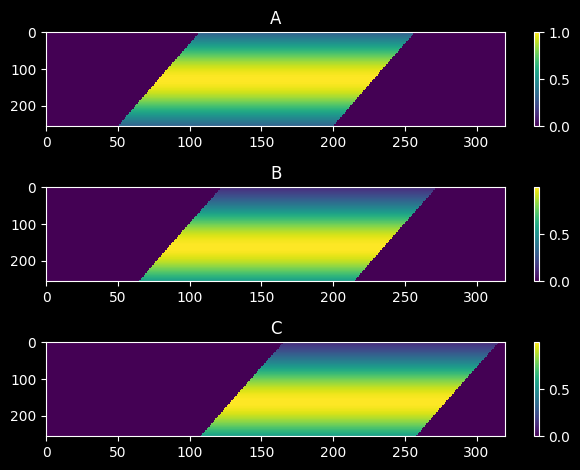

In [4]:
eta_array = eta + eta_c




# R_0_B = np.sqrt(R_0**2 + (Vr*(eta_c-eta_B_c))**2)
R_0_B = R_0
R_0_C = R_0 + 100
A_a = -50
B_a = 50
C_a = B_a + (R_0_C - R_0_B) * np.tan(theta_rc)
NPosition = [A_a, B_a, C_a]
R = [R_0, R_0_B, R_0_C]
Tar_t_eta_0 = np.zeros(3)
Tar_t_eta_c = np.zeros(3)
for i in range(3):
    Tar_t_eta_0[i] = NPosition[i] / Vr

for i in range(3):
    DeltaX = NPosition[i] -R[i] * np.tan(theta_rc)
    Tar_t_eta_c[i] = DeltaX / Vr
eta_B_c = Tar_t_eta_c[1]
eta_C_c = Tar_t_eta_c[2]
print('etac_B:',eta_B_c,'etac_C:',eta_C_c)

print(Tar_t_eta_0)


theta_bw = 0.886*sc.c/f0/La
print('La:',La)
print('theta_bw:',theta_bw)
# np.sinc(0.886*np.atan(Vr*(eta_array-eta_c)/R_0)/theta_bw)
# S_2d_A = rectan*np.sinc(eta_array-eta_c)**2*np.exp(-1j*4*np.pi*R_eta*f0/sc.c)\
#         *np.exp(1j*np.pi*Kr*(tau-2*(R_eta-R_etac)/sc.c)**2)
R_eta_A = np.sqrt(R_0**2 + (Vr*(eta_array-Tar_t_eta_0[0]))**2)  
R_eta_B = np.sqrt(R_0_B**2 + (Vr*(eta_array-Tar_t_eta_0[1]))**2)  
R_eta_C = np.sqrt(R_0_C**2 + (Vr*(eta_array-Tar_t_eta_0[2]))**2)  

rectan_A = (np.abs(tau-2*(R_eta_A-R_etac)/sc.c)<=Tr/2)

S_2d_A= rectan_A*np.sinc(0.886*np.arctan(Vr*(eta_array-eta_c)/R_0)/theta_bw)**2*np.exp(-1j*4*np.pi*R_eta_A*f0/sc.c)\
          *np.exp(1j*np.pi*Kr*(tau-2*(R_eta_A-R_etac)/sc.c)**2)


rectan_B = (np.abs(tau-2*(R_eta_B-R_etac)/sc.c)<=Tr/2)
rectan_C = (np.abs(tau-2*(R_eta_C-R_etac)/sc.c)<=Tr/2)

S_2d_B = rectan_B*np.sinc(0.886*np.arctan(Vr*(eta_array-eta_B_c)/R_0_B)/theta_bw)**2*np.exp(-1j*4*np.pi*R_eta_B*f0/sc.c)\
        *np.exp(1j*np.pi*Kr*(tau-2*(R_eta_B-R_etac)/sc.c)**2)
S_2d_C = rectan_C*np.sinc(0.886*np.arctan(Vr*(eta_array-eta_C_c)/R_0_C)/theta_bw)**2*np.exp(-1j*4*np.pi*R_eta_C*f0/sc.c)\
        *np.exp(1j*np.pi*Kr*(tau-2*(R_eta_C-R_etac)/sc.c)**2)

plt.figure()
plt.subplot(3,1,1)
plt.pcolormesh(np.abs(S_2d_A))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('A')
plt.colorbar()

plt.subplot(3,1,2)
plt.pcolormesh(np.abs(S_2d_B))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('B')
plt.colorbar()

plt.subplot(3,1,3)
plt.pcolormesh(np.abs(S_2d_C))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('C')
plt.colorbar()


plt.tight_layout()
plt.show()


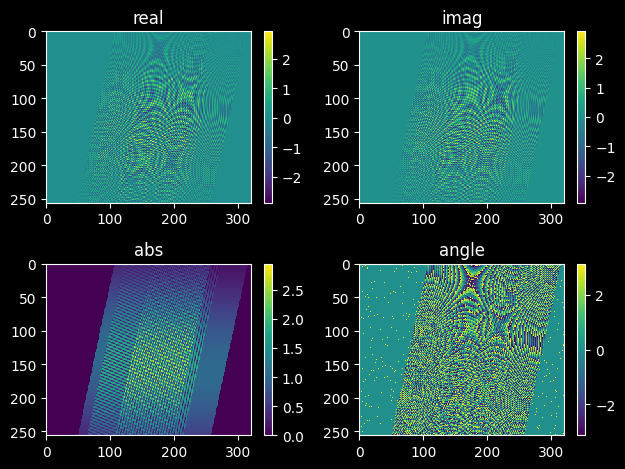

In [5]:
S_2d = S_2d_A + S_2d_B + S_2d_C
plt.figure()
plt.subplot(2,2,1)
plt.pcolormesh(np.real(S_2d))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('real')
plt.colorbar()

plt.subplot(2,2,2)
plt.pcolormesh(np.imag(S_2d))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('imag')
plt.colorbar()

plt.subplot(2,2,3)
plt.pcolormesh(np.abs(S_2d))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('abs')
plt.colorbar()

plt.subplot(2,2,4)
plt.pcolormesh(np.angle(S_2d))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('angle')
plt.colorbar()

plt.tight_layout()
plt.show()

距离压缩

N_range_fft: 320 N_azimuth_fft: 256


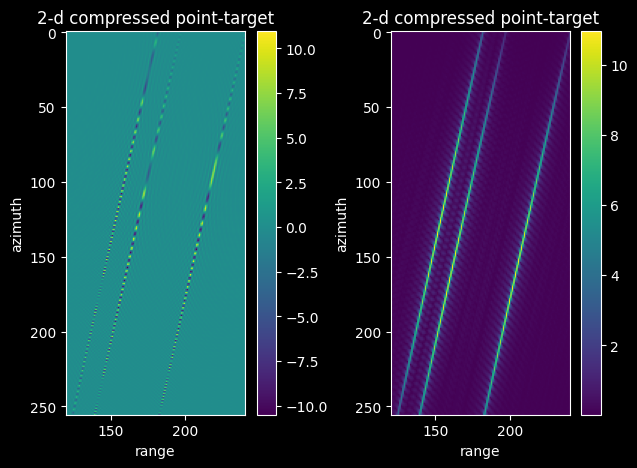

In [6]:
index = (tau<Tr/2)*(tau>=-Tr/2)
index = np.where(index ==True)
# print(index[1])
x_chirp = np.exp(1j*np.pi*Kr*(tau[0,index[1]])**2)

# N_range_fft = int(2**np.ceil(np.log2(N_rg)))
# N_azimuth_fft = int(2**np.ceil(np.log2(N_az)))

N_range_fft = N_rg
N_azimuth_fft = N_az


print('N_range_fft:',N_range_fft,'N_azimuth_fft:',N_azimuth_fft)

# S_2d_rf = sf.fft(S_2d,N_range_fft,axis=1)
# # h_2_fft = np.conjugate(sf.fft(x_chirp,N_range_fft))

Bw = abs(Kr)*Tr
f_rg = np.fft.fftshift(np.linspace(-Fr/2, Fr/2 - Fr/N_range_fft, N_range_fft))
f_rg -= np.round((f_rg - 0) / Fr) * Fr
f_rg1 = sf.fftfreq(N_range_fft,1/Fr)

# h_2_fft = (abs(f_rg)<=Bw/2)*np.exp(1j*np.pi*f_rg**2/Kr)

# S_mf = sf.ifft(S_2d_rf*h_2_fft,axis=1)

window = ss.get_window(window=('kaiser',0),Nx=N_rg)  # 时域窗
Window = np.fft.fftshift(window)  # 频域窗
Hrf = (np.abs(f_rg) <= Bw/2) * Window * np.exp(1j * np.pi * f_rg**2 / Kr)
Sf_ft = np.fft.fft(S_2d, axis=1)
Srf_tf = Sf_ft * Hrf
S_mf = np.fft.ifft(Srf_tf, axis=1)
# print(np.abs(S_mf))
plt.figure()
plt.subplot(1,2,1)
plt.imshow((np.real(S_mf)))
plt.title('2-d compressed point-target')
plt.xlabel('range')
plt.ylabel('azimuth')
plt.colorbar()
plt.xlim(120,240)


plt.subplot(1,2,2)
plt.imshow((np.abs(S_mf)))
plt.title('2-d compressed point-target')
plt.xlabel('range')
plt.ylabel('azimuth')
plt.colorbar()
plt.xlim(120,240)

plt.tight_layout()
plt.show()

方位向FFT

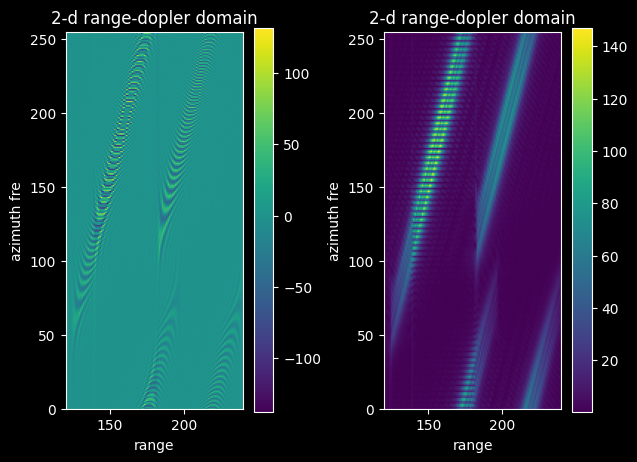

In [7]:
S_rdf = sf.fft(S_mf,N_azimuth_fft,axis=0)
# f_azi = sf.fftfreq(N_azimuth_fft,1/Fa)
f_azi = np.fft.fftshift(np.linspace(-Fa/2, Fa/2 - Fa/N_azimuth_fft, N_azimuth_fft))
f_azi = f_azi + np.round((-f_azi+f_etac)/Fa)*Fa
# f_azi = f_azi + np.round((f_etac)/Fa)*Fa
# f_azi = sf.fftfreq(N_azimuth_fft,1/Fa) + f_etac
plt.figure()
plt.subplot(1,2,1)
plt.imshow((np.real(S_rdf)))
plt.title('2-d range-dopler domain')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(120,240)
plt.ylim(0,N_azimuth_fft-1)

plt.subplot(1,2,2)
plt.imshow((np.abs(S_rdf)))
plt.title('2-d range-dopler domain')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(120,240)
plt.ylim(0,N_azimuth_fft-1)
plt.tight_layout()
plt.show()

SRC(option 2)

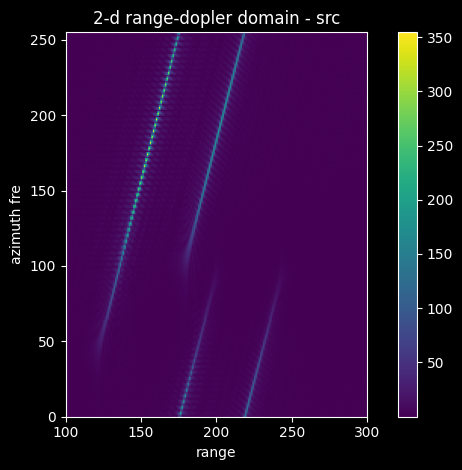

In [8]:
D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi**2/(4*Vr**2))
K_src = (2*Vr**2*f0**3*D_rcm**3/(sc.c*R_0*f_azi**2)).reshape(N_azimuth_fft,1)

f_rg = np.fft.fftshift(np.linspace(-Fr/2, Fr/2, N_range_fft))
f_rg -= np.round((f_rg - 0) / Fr) * Fr
H_src = np.exp(-1j*np.pi*f_rg**2/K_src)

S_rdf_src = sf.ifft(sf.fft(S_rdf,N_range_fft,axis=-1)*H_src,axis=-1)
plt.figure()
# plt.subplot(1,2,1)
# plt.imshow((np.abs(S_rdf)))
# plt.title('2-d range-dopler domain')
# plt.xlabel('range')
# plt.ylabel('azimuth fre')
# plt.colorbar()
# plt.xlim(50,200)
# plt.ylim(0,N_azimuth_fft-1)

# plt.subplot(1,2,2)
plt.imshow((np.abs(S_rdf_src)))
plt.title('2-d range-dopler domain - src')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(100,300)
plt.ylim(0,N_azimuth_fft-1)

plt.tight_layout()
plt.show()

RCMC

In [23]:
range_pixel = sc.c/Fr/2
range_shift = (R_eta_A.max()-R_eta_A.min())/range_pixel
print('range_pixel',range_pixel)
print('RCM_total:',range_shift)

# tau_fft = np.linspace(-T_rg/2,-T_rg/2 + N_range_fft*T_rg/N_rg, N_range_fft) 
tau_fft = np.linspace(-T_rg/2,T_rg/2 - T_rg/N_range_fft, N_range_fft) 
tau_array = tau_fft + 2*R_etac/sc.c
R0_tau = tau_array*sc.c/2* np.cos(theta_rc)
R0_tau = R0_tau.flatten()


# RCM_Q  = (sc.c/f0)**2*R_0/(8*Vr**2)*f_azi**2/range_pixel
D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi.reshape(len(f_azi),1)**2/(4*Vr**2))

RCM_Q = (R_0 - R_etac + R0_tau/D_rcm - R0_tau)/range_pixel #矫正至R_etaC处 : R' - R0 = RCM, R'- R_etaC = RCM + R0 -R_etaC



range_pixel 2.498270483333333
RCM_total: 56.74290410769588


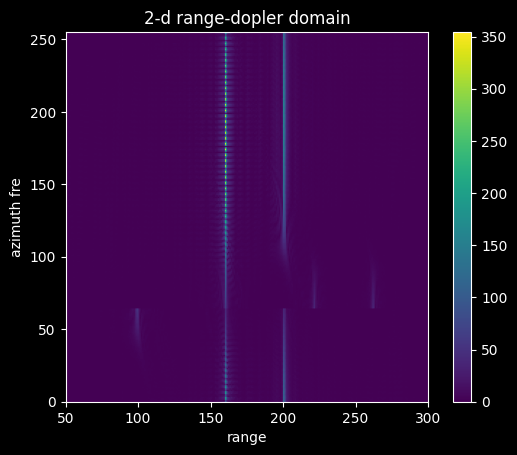

In [24]:

interp_num = 16
interp_step = 16
interp_pos = np.linspace(0,1-1/interp_step,interp_step)
interp_ind = np.arange(-interp_num/2,interp_num/2,1)
interp_xvalue = interp_ind.reshape(1,interp_num) - interp_pos.reshape(interp_step,1)
interp_sinc = np.sinc(interp_xvalue)
window = ss.get_window(window=('kaiser',0),Nx=interp_num).reshape(1,interp_num)
interp_sinc *= window
interp_sinc /= np.sum(interp_sinc, axis=1, keepdims=True) 

# print(interp_xvalue)
S_rdf_c = np.zeros_like(S_rdf_src)
N_pad = 256
S_rdf_pad = np.zeros([S_rdf_src.shape[0],N_pad+S_rdf_src.shape[1]],dtype=np.complex128)
S_rdf_pad[:,0:int(N_pad/2)] = 0
S_rdf_pad[:,S_rdf_src.shape[1]+int(N_pad/2):N_pad+S_rdf_src.shape[1]] = 0
S_rdf_pad[:,int(N_pad/2):S_rdf_src.shape[1]+int(N_pad/2)] = S_rdf_src
for i in range(RCM_Q.shape[0]):
    for j in range(S_rdf_c.shape[1]):
        points = int(np.floor(RCM_Q[i,j]))
        offset = int(np.round((RCM_Q[i,j] - np.floor(RCM_Q[i,j]))*interp_step))
        # print('1:','points:',points,'offset',offset)
        points += offset//interp_step
        offset = np.remainder(offset,interp_step)
        # print('2:','points:',points,'offset',offset)
        S_rdf_c[i,j] = np.sum(S_rdf_pad[i,int(N_pad/2)+j+points-int(interp_num/2):int(N_pad/2)+j+points+int(interp_num/2)]*interp_sinc[offset,:])
plt.figure()
plt.imshow((np.abs(S_rdf_c)))
plt.title('2-d range-dopler domain')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(50,300)
plt.ylim(0,N_azimuth_fft-1)
plt.show()

方位向压缩

R0_A: 18558.63612984532 R0_B: 18558.63612984532 R0_C: 18658.63612984532
1.005388326992369


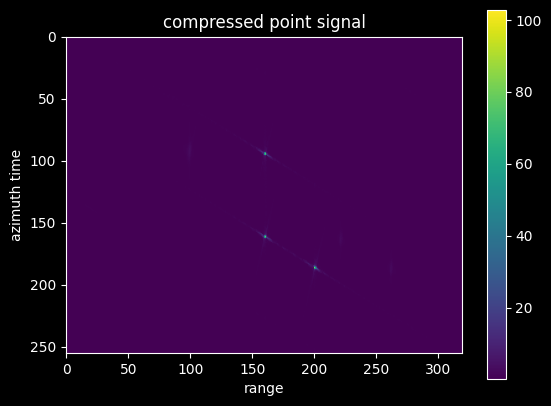

In [25]:
print('R0_A:',R_0,'R0_B:',R_0_B,'R0_C:',R_0_C)
print(R_0_C/R_0)
D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi.reshape(len(f_azi),1)**2/(4*Vr**2))
Haz = np.exp(1j*4*np.pi*R0_tau.reshape(1,len(R0_tau))*f0*D_rcm/sc.c)
Haf_offset = np.exp(-1j*2*np.pi*(f_azi.reshape(len(f_azi),1))*eta_c)
S_mf_2 = sf.ifft(S_rdf_c*Haz*Haf_offset,axis=0)
plt.figure()
plt.imshow((np.abs(S_mf_2)))
plt.title('compressed point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')
plt.colorbar()
# plt.xlim(0,200)
plt.ylim(N_azimuth_fft-1,0)
plt.show()

SRC(option 3)

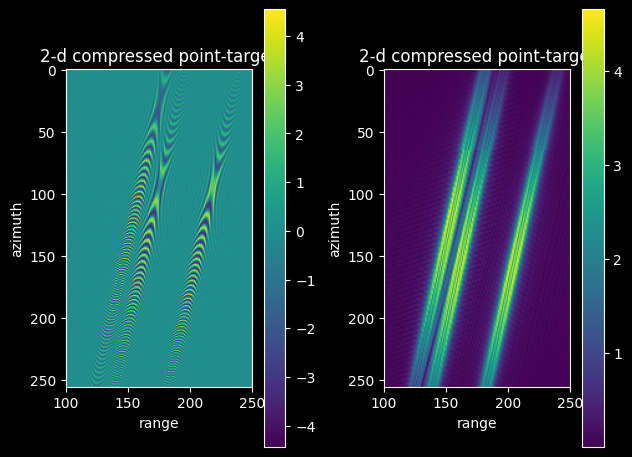

In [26]:


# D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi**2/(4*Vr**2))
# K_src = (2*Vr**2*f0**3*D_rcm**3/(sc.c*R_0*f_azi**2)).reshape(N_azimuth_fft,1)
# f_rg = sf.fftfreq(N_range_fft,1/Fr).reshape(1,N_range_fft)
# H_src = np.exp(-1j*np.pi*f_rg**2/K_src)
H_r = np.exp(1j*np.pi*f_rg**2/Kr).reshape(1,N_range_fft)
H_m = H_r*H_src

S_2d_rf = sf.fft(S_2d,N_range_fft,axis=1)

S_mf_o3 = sf.ifft(S_2d_rf*H_m,axis=1)
plt.figure()
plt.subplot(1,2,1)
plt.imshow((np.real(S_mf_o3)))
plt.title('2-d compressed point-target')
plt.xlabel('range')
plt.ylabel('azimuth')
plt.colorbar()
plt.xlim(100,250)

plt.subplot(1,2,2)
plt.imshow((np.abs(S_mf_o3)))
plt.title('2-d compressed point-target')
plt.xlabel('range')
plt.ylabel('azimuth')
plt.colorbar()
plt.xlim(100,250)

plt.tight_layout()
plt.show()

方位向FFT

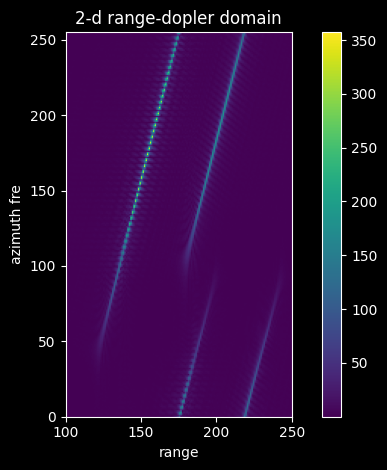

In [27]:
S_rdf_src_o3 = sf.fft(S_mf_o3,N_azimuth_fft,axis=0)
# f_azi = sf.fftfreq(N_azimuth_fft,1/Fa)
# f_azi = f_azi + np.round((-f_azi+f_etac)/Fa)*Fa
# f_azi = sf.fftfreq(N_azimuth_fft,1/Fa) + f_etac
plt.figure()
# plt.subplot(1,2,1)
# plt.imshow((np.real(S_rdf_src_o3)))
# plt.title('2-d range-dopler domain')
# plt.xlabel('range')
# plt.ylabel('azimuth fre')
# plt.colorbar()
# plt.xlim(100,250)
# plt.ylim(0,N_azimuth_fft-1)

# plt.subplot(1,2,2)
plt.imshow((np.abs(S_rdf_src_o3)))
plt.title('2-d range-dopler domain')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(100,250)
plt.ylim(0,N_azimuth_fft-1)
plt.tight_layout()
plt.show()

RCMC

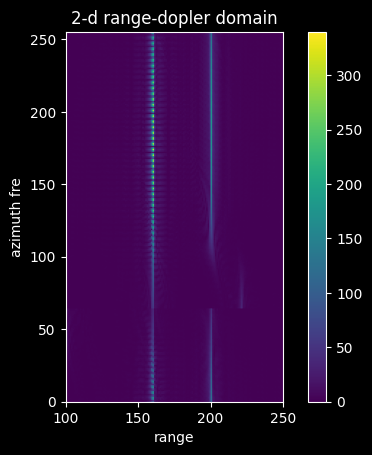

In [28]:
# range_pixel = sc.c/Fr/2
# range_shift = (R_eta.max()-R_eta.min())/range_pixel
# print('range_pixel',range_pixel)
# print('RCM_total:',range_shift)


# RCM_Q  = (sc.c/f0)**2*R_0/(8*Vr**2)*f_azi**2/range_pixel
# D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi**2/(4*Vr**2))

# RCM_Q = (R_0/D_rcm - R_etac)/range_pixel


# interp_num = 16
# interp_step = 16
# interp_pos = np.linspace(0,1-1/interp_step,interp_step)
# interp_ind = np.arange(-interp_num/2,interp_num/2,1)
# interp_xvalue = interp_ind.reshape(1,interp_num) - interp_pos.reshape(interp_step,1)
# interp_sinc = np.sinc(interp_xvalue)
# window = ss.get_window(window=('kaiser',0),Nx=interp_num)
# print(interp_xvalue)
S_rdf_c_o3 = np.zeros_like(S_rdf_src)
N_pad = 256
S_rdf_pad_o3 = np.zeros([S_rdf_src.shape[0],N_pad+S_rdf_src.shape[1]],dtype=np.complex128)
S_rdf_pad_o3[:,0:int(N_pad/2)] = 0
S_rdf_pad_o3[:,S_rdf_src.shape[1]+int(N_pad/2):N_pad+S_rdf_src.shape[1]] = 0
S_rdf_pad_o3[:,int(N_pad/2):S_rdf_src.shape[1]+int(N_pad/2)] = S_rdf_src_o3
for i in range(RCM_Q.shape[0]):
    for j in range(S_rdf_c.shape[1]):
        points = int(np.floor(RCM_Q[i,j]))
        offset = int(np.round((RCM_Q[i,j] - np.floor(RCM_Q[i,j]))*interp_step))
        # print('1:','points:',points,'offset',offset)
        points += offset//interp_step
        offset = np.remainder(offset,interp_step)
        # print('2:','points:',points,'offset',offset)
        S_rdf_c_o3[i,j] = np.sum(S_rdf_pad_o3[i,int(N_pad/2)+j+points-int(interp_num/2):int(N_pad/2)+j+points+int(interp_num/2)]*interp_sinc[offset,:])
plt.imshow((np.abs(S_rdf_c_o3)))
plt.title('2-d range-dopler domain')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(100,250)
plt.ylim(0,N_azimuth_fft-1)
plt.show()

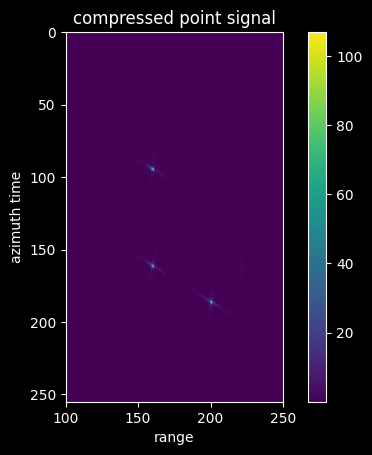

In [29]:
# print('R0_A:',R_0,'R0_B:',R_0_B,'R0_C:',R_0_C)
# print(R_0_C/R_0)
# D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi**2/(4*Vr**2))
# Haz = np.exp(1j*4*np.pi*R_0*f0*D_rcm/sc.c).reshape(N_azimuth_fft,1)
S_mf_2_o3 = sf.ifft(S_rdf_c_o3*Haz*Haf_offset,axis=0)
plt.figure()
plt.imshow((np.abs(S_mf_2_o3)))
plt.title('compressed point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')
plt.colorbar()
plt.xlim(100,250)
plt.ylim(N_azimuth_fft-1,0)
plt.show()

C单独仿真

N_range_fft: 320 N_azimuth_fft: 256


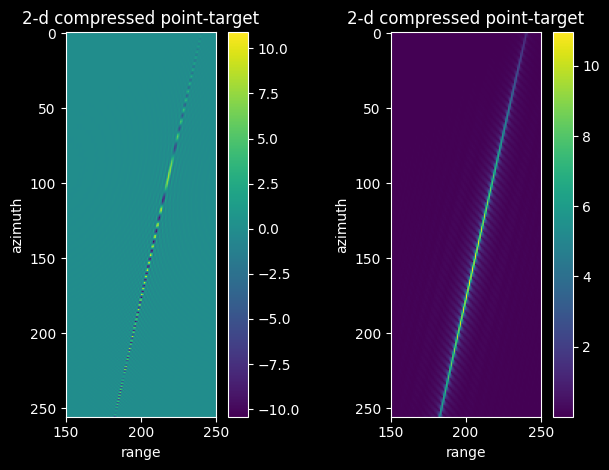

In [30]:
# index = (tau<Tr/2)*(tau>=-Tr/2)
# index = np.where(index ==True)
# x_chirp = np.exp(1j*np.pi*Kr*(tau[0,index[1]])**2)

# N_range_fft = int(2**np.ceil(np.log2(N_rg)))
# N_azimuth_fft = int(2**np.ceil(np.log2(N_az)))

print('N_range_fft:',N_range_fft,'N_azimuth_fft:',N_azimuth_fft)
S_2d_rf_C = np.fft.fft(S_2d_C, axis=1)
Srf_tf_C = S_2d_rf_C * Hrf
S_mf_C = np.fft.ifft(Srf_tf_C, axis=1)

plt.figure()
plt.subplot(1,2,1)
plt.imshow((np.real(S_mf_C)))
plt.title('2-d compressed point-target')
plt.xlabel('range')
plt.ylabel('azimuth')
plt.colorbar()
plt.xlim(150,250)

plt.subplot(1,2,2)
plt.imshow((np.abs(S_mf_C)))
plt.title('2-d compressed point-target')
plt.xlabel('range')
plt.ylabel('azimuth')
plt.colorbar()
plt.xlim(150,250)

plt.tight_layout()
plt.show()

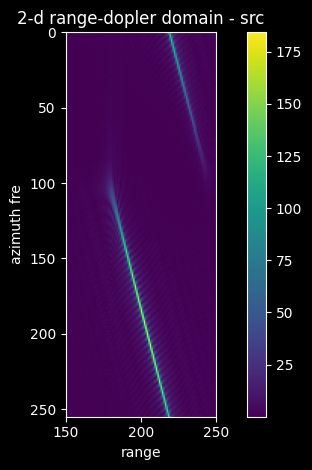

In [31]:
S_rdf_C = sf.fft(S_mf_C,N_azimuth_fft,axis=0)

# D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi**2/(4*Vr**2))
# K_src = (2*Vr**2*f0**3*D_rcm**3/(sc.c*R_0*f_azi**2)).reshape(N_azimuth_fft,1)
D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi**2/(4*Vr**2))
K_src_C = (2*Vr**2*f0**3*D_rcm**3/(sc.c*R_0_C*f_azi**2)).reshape(N_azimuth_fft,1)

H_src_C = np.exp(-1j*np.pi*f_rg**2/K_src_C)

S_rdf_src_C = sf.ifft(sf.fft(S_rdf_C,N_range_fft,axis=-1)*H_src_C,axis=-1)
plt.figure()
# plt.subplot(1,2,1)
# plt.imshow((np.abs(S_rdf)))
# plt.title('2-d range-dopler domain')
# plt.xlabel('range')
# plt.ylabel('azimuth fre')
# plt.colorbar()
# plt.xlim(50,200)
# plt.ylim(0,N_azimuth_fft-1)

# plt.subplot(1,2,2)
plt.imshow((np.abs(S_rdf_src_C)))
plt.title('2-d range-dopler domain - src')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(150,250)
plt.ylim(N_azimuth_fft-1,0)

plt.tight_layout()
plt.show()

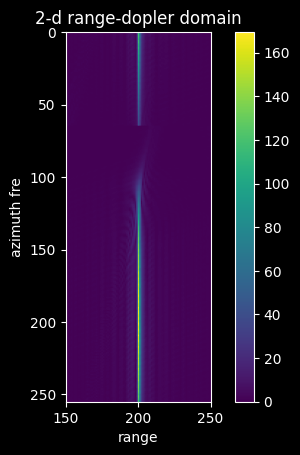

In [32]:
# range_pixel = sc.c/Fr/2
# range_shift = (R_eta.max()-R_eta.min())/range_pixel
# print('range_pixel',range_pixel)
# print('RCM_total:',range_shift)



# RCM_Q  = (sc.c/f0)**2*R_0/(8*Vr**2)*f_azi**2/range_pixel
# D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi**2/(4*Vr**2))

# RCM_Q_C = (R_0_C/D_rcm - R_etac)/range_pixel

D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi.reshape(len(f_azi),1)**2/(4*Vr**2))

RCM_Q_C = (R_0_C - R_etac + R0_tau/D_rcm - R0_tau)/range_pixel
# interp_num = 16
# interp_step = 16
# interp_pos = np.linspace(0,1-1/interp_step,interp_step)
# interp_ind = np.arange(-interp_num/2,interp_num/2,1)
# interp_xvalue = interp_ind.reshape(1,interp_num) - interp_pos.reshape(interp_step,1)
# interp_sinc = np.sinc(interp_xvalue)
# window = ss.get_window(window=('kaiser',0),Nx=interp_num)
# print(interp_xvalue)
S_rdf_c_C = np.zeros_like(S_rdf_src_C)
N_pad = 256
S_rdf_pad_C = np.zeros([S_rdf_src_C.shape[0],N_pad+S_rdf_src_C.shape[1]],dtype=np.complex128)
S_rdf_pad_C[:,0:int(N_pad/2)] = 0
S_rdf_pad_C[:,S_rdf_src_C.shape[1]+int(N_pad/2):N_pad+S_rdf_src_C.shape[1]] = 0
S_rdf_pad_C[:,int(N_pad/2):S_rdf_src_C.shape[1]+int(N_pad/2)] = S_rdf_src_C
for i in range(RCM_Q.shape[0]):
    for j in range(S_rdf_c.shape[1]):
        points = int(np.floor(RCM_Q[i,j]))
        offset = int(np.round((RCM_Q[i,j] - np.floor(RCM_Q[i,j]))*interp_step))
        # print('1:','points:',points,'offset',offset)
        points += offset//interp_step
        offset = np.remainder(offset,interp_step)
        # print('2:','points:',points,'offset',offset)
        S_rdf_c_C[i,j] = np.sum(S_rdf_pad_C[i,int(N_pad/2)+j+points-int(interp_num/2):int(N_pad/2)+j+points+int(interp_num/2)]*interp_sinc[offset,:])
plt.figure()
plt.imshow((np.abs(S_rdf_c_C)))
plt.title('2-d range-dopler domain')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(150,250)
plt.ylim(N_azimuth_fft-1,0)
plt.show()

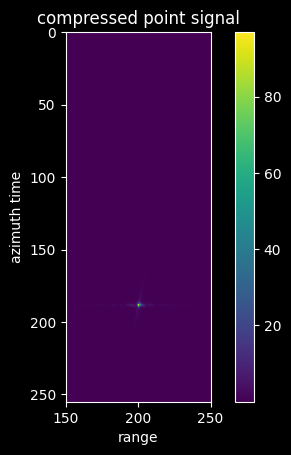

In [33]:
# print('R0_A:',R_0,'R0_B:',R_0_B,'R0_C:',R_0_C)
# print(R_0_C/R_0)
# D_rcm = np.sqrt(1-(sc.c/f0)**2*f_azi**2/(4*Vr**2))
Haz_C = np.exp(1j*4*np.pi*R_0_C*f0*D_rcm/sc.c).reshape(N_azimuth_fft,1)
S_mf_2_C = sf.ifft(S_rdf_c_C*Haz_C*Haf_offset,axis=0)
plt.figure()
plt.imshow((np.abs(S_mf_2_C)))
plt.title('compressed point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')
plt.colorbar()
plt.xlim(150,250)
plt.ylim(N_azimuth_fft-1,0)
plt.show()

188 50


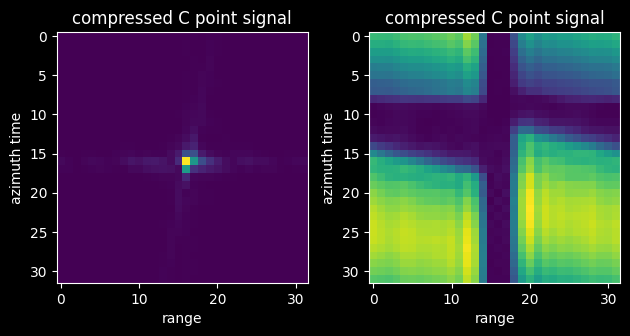

In [34]:
C_point_range = S_rdf_c_C[:,150:250]
center_y,center_x = np.abs(C_point_range).argmax()//C_point_range.shape[1], \
                    np.remainder(np.abs(C_point_range).argmax(),C_point_range.shape[1])
                                                                     
C_compoint_range = S_mf_2_C[:,150:250]


com_center_y,com_center_x = np.abs(C_compoint_range).argmax()//C_compoint_range.shape[1],\
                            np.remainder(np.abs(C_compoint_range).argmax(),C_compoint_range.shape[1])

print(com_center_y,com_center_x)

C_point = C_compoint_range[com_center_y-16:com_center_y+16,com_center_x-16:com_center_x+16]
# C_point = S_mf_2[:,com_center_x-16:com_center_x+16]
plt.figure()
plt.subplot(1,2,1)
plt.imshow((np.abs(C_point)))
plt.title('compressed C point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')

plt.subplot(1,2,2)
plt.imshow(np.abs((sf.fft2((C_point)))))
plt.title('compressed C point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'azimuth time')

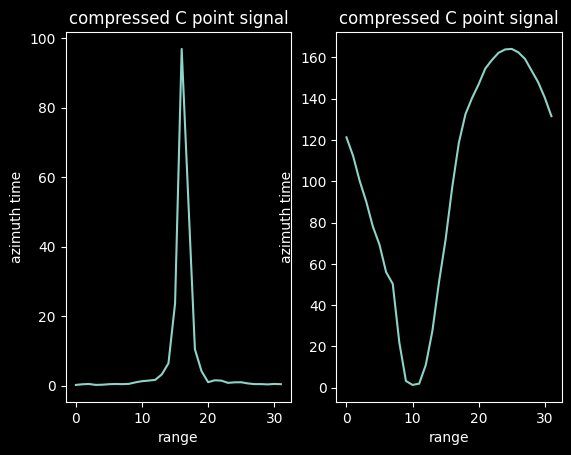

In [35]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(range(32),np.abs(C_point[:,16]))
plt.title('compressed C point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')

plt.subplot(1,2,2)
plt.plot(range(32),np.abs(sf.fft(C_point[:,16])))
plt.title('compressed C point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')

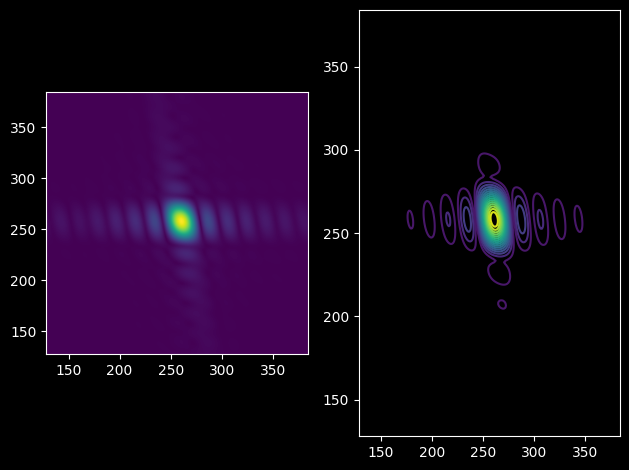

In [37]:
K = 16
N = 32
C_2ft = sf.fft2((C_point))
C_rp_fft = np.zeros([N,K*N],dtype=np.complex128)
for i in range(N):
    x_min = np.argmin(np.abs(C_2ft[i,:]))
    C_rp_fft[i,0:x_min] = C_2ft[i,0:x_min]
    C_rp_fft[i,K*N-(N-x_min):K*N] = C_2ft[i,x_min:N]

C_rp_fft_u = np.zeros([K*N,K*N],dtype=np.complex128)
for j in range(K*N):
    y_min = np.argmin(np.abs(C_rp_fft[:,j]))
    C_rp_fft_u[0:y_min,j] = C_rp_fft[0:y_min,j]
    C_rp_fft_u[K*N-(N-y_min):K*N,j] = C_rp_fft[y_min:N,j]
c_ups = sf.ifft2(C_rp_fft_u )
# c_ups = ss.resample(ss.resample(C_point,K*N,axis=-1),K*N,axis=0)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.abs(c_ups))
plt.xlim(128,128+256)
plt.ylim(128,128+256)

plt.subplot(1,2,2)
plt.contour((np.linspace(0,K*N,K*N)),(np.linspace(0,K*N,K*N)),\
             np.abs(c_ups),levels = 20)
plt.xlim(128,128+256)
plt.ylim(128,128+256)
# plt.contour((np.linspace(0,K*N,K*N))[int(K*N/2-N):int(K*N/2+N)],(np.linspace(0,K*N,K*N))[int(K*N/2-N):int(K*N/2+N)],\
#             np.abs(x_pad[int(K*N/2-N):int(K*N/2+N),int(K*N/2-N):int(K*N/2+N)]))
# plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()